In [30]:
import pandas as pd
import numpy as np      
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [31]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [32]:
rs = 123 

In [33]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = rs)

In [35]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (455, 30), y_train: (455,)


In [36]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (114, 30), y_test: (114,)


In [37]:
penalty = "l2"
solver = 'lbfgs'
C = 1.0
max_iter = 1000

In [38]:
l2_model = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter, random_state=rs)
l2_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=123)

In [39]:
l2_preds = l2_model.predict(X_test)

In [40]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['praecision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [41]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9736842105263158,
 'recall': array([0.97222222, 0.97619048]),
 'praecision': array([0.98591549, 0.95348837]),
 'f1score': array([0.97902098, 0.96470588])}

In [42]:
penalty = "l1"
solver = 'liblinear'
c = 1.0
max_iter = 1000 
l1_model = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter, random_state=rs)
l1_model.fit(X_train, y_train)
l1_preds = l1_model.predict(X_test)
evaluate_metrics(y_test, l1_preds)


{'accuracy': 0.9649122807017544,
 'recall': array([0.95833333, 0.97619048]),
 'praecision': array([0.98571429, 0.93181818]),
 'f1score': array([0.97183099, 0.95348837])}

### GridSearch

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


pipeline = Pipeline([
    ('model', LogisticRegression(random_state=rs))  
])


param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],  
    'model__penalty': ['l1', 'l2'],  
    'model__solver': ['liblinear'],  
    'model__max_iter': [100, 200, 500, 1000]  
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))
print("Test F1 Score:", f1_score(y_test, y_pred))


train_preds = best_model.predict(X_train)
precision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average='binary')
accuracy_train = accuracy_score(y_train, train_preds)



print("\nTraining Set Results:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F-Score: {f_beta_train:.2f}")


Best Parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Accuracy: 0.9824416172882536
Test Accuracy: 0.9736842105263158
Test Precision: 0.9534883720930233
Test Recall: 0.9761904761904762
Test F1 Score: 0.9647058823529412

Training Set Results:
Accuracy: 0.98
Precision: 0.99
Recall: 0.96
F-Score: 0.97


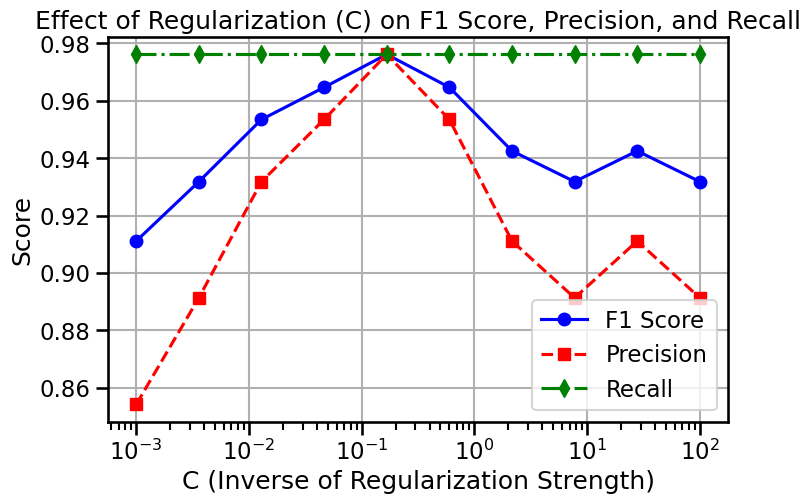

In [44]:
from sklearn.metrics import f1_score, precision_score, recall_score
C_values = np.logspace(-3, 2, 10)  # Values from 0.001 to 100
f1_scores = []
precision_scores = []
recall_scores = []

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.plot(C_values, f1_scores, marker='o', linestyle='-', color='b', label="F1 Score")
plt.plot(C_values, precision_scores, marker='s', linestyle='--', color='r', label="Precision")
plt.plot(C_values, recall_scores, marker='d', linestyle='-.', color='g', label="Recall")

plt.xscale("log") 
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Score")
plt.title("Effect of Regularization (C) on F1 Score, Precision, and Recall")
plt.legend()
plt.grid(True)
plt.show()

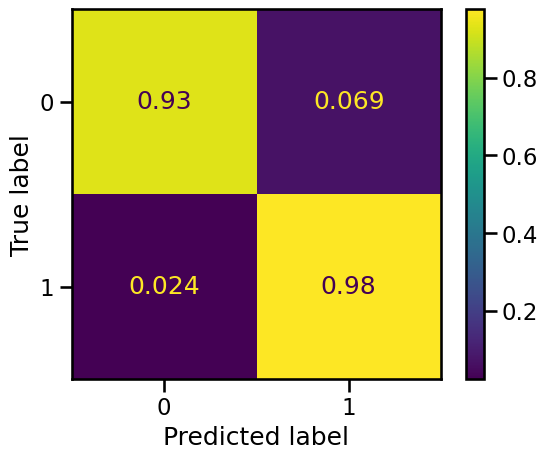

In [45]:
cf = confusion_matrix(y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=best_model.classes_)
disp.plot()
plt.show()

In [46]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [47]:
smote_sampler = SMOTE(random_state = rs)

In [48]:
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

<Axes: xlabel='diagnosis'>

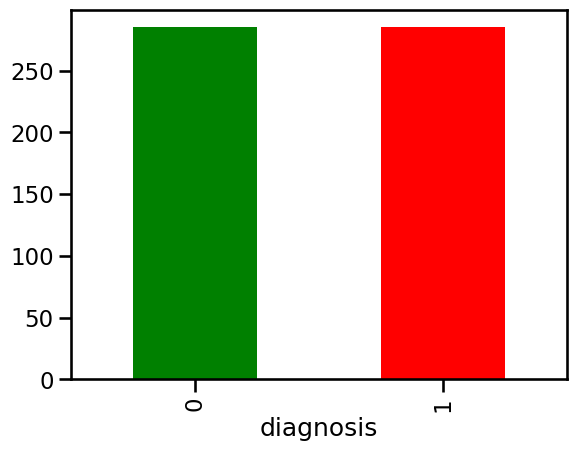

In [49]:
y_smo.value_counts().plot.bar(color=['green', 'red'])

In [50]:
model.fit(X_smo, y_smo)
preds = model.predict(X_test)

In [58]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision_test, recall_test, f_beta_test, _ = precision_recall_fscore_support(y_test, preds, beta=5, pos_label=1, average='binary')
accuracy_test = accuracy_score(y_test, preds)
train_preds = model.predict(X_train)
precision_train, recall_train, f_beta_train, _ = precision_recall_fscore_support(y_train, train_preds, beta=5, pos_label=1, average='binary')
accuracy_train = accuracy_score(y_train, train_preds)


print("Test Set Results:")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F-Score: {f_beta_test:.2f}")


print("\nTraining Set Results:")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F-Score: {f_beta_train:.2f}")

Test Set Results:
Accuracy: 0.90
Precision: 0.80
Recall: 0.98
F-Score: 0.97

Training Set Results:
Accuracy: 0.96
Precision: 0.90
Recall: 1.00
F-Score: 1.00
